In [ ]:
import kagglehub
import os
path = kagglehub.dataset_download("madhuraatmarambhagat/crop-recommendation-dataset")
path_list=os.listdir(path)
print(path+'/'+path_list[0])

/kaggle/input/crop-recommendation-dataset/Crop_recommendation.csv


In [ ]:
import pandas as pd

In [ ]:
data=pd.read_csv("/kaggle/input/crop-recommendation-dataset/Crop_recommendation.csv")

In [ ]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
data.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [ ]:
data.isnull().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [ ]:
data=data.rename(columns={
    'N': 'Nitrogen',
    'P': 'Phosphorus',
    'K': 'Potassium',
    'ph': 'pH',
    'label': 'Crop'
})


In [ ]:
data.head()

,Nitrogen,Phosphorus,Potassium,temperature,humidity,pH,rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
data['Nitrogen']

,Nitrogen
0,90
1,85
2,60
3,74
4,78
...,...
2195,107
2196,99
2197,118
2198,117


In [ ]:
data['Nitrogen'].describe()

,Nitrogen
count,2200.000000
mean,50.551818
std,36.917334
min,0.000000
25%,21.000000
50%,37.000000
75%,84.250000
max,140.000000


In [ ]:
import seaborn as sea
import matplotlib.pyplot as plt

<Axes: xlabel='Nitrogen', ylabel='Count'>

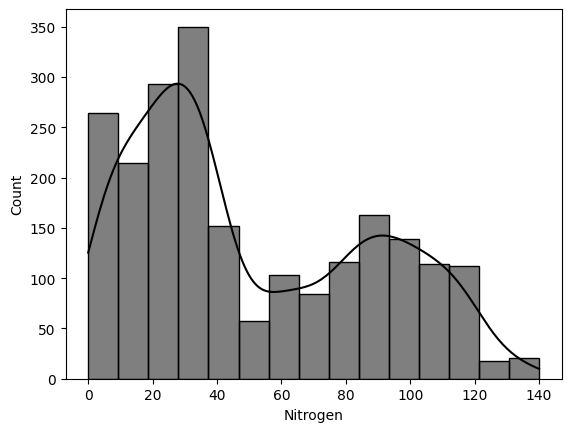

In [ ]:
sea.histplot(data['Nitrogen'],kde=True,color='black')

In [ ]:
data['Nitrogen'].value_counts()

,count
Nitrogen,
22,44
40,44
27,42
39,41
31,41
...,...
132,2
46,1
135,1


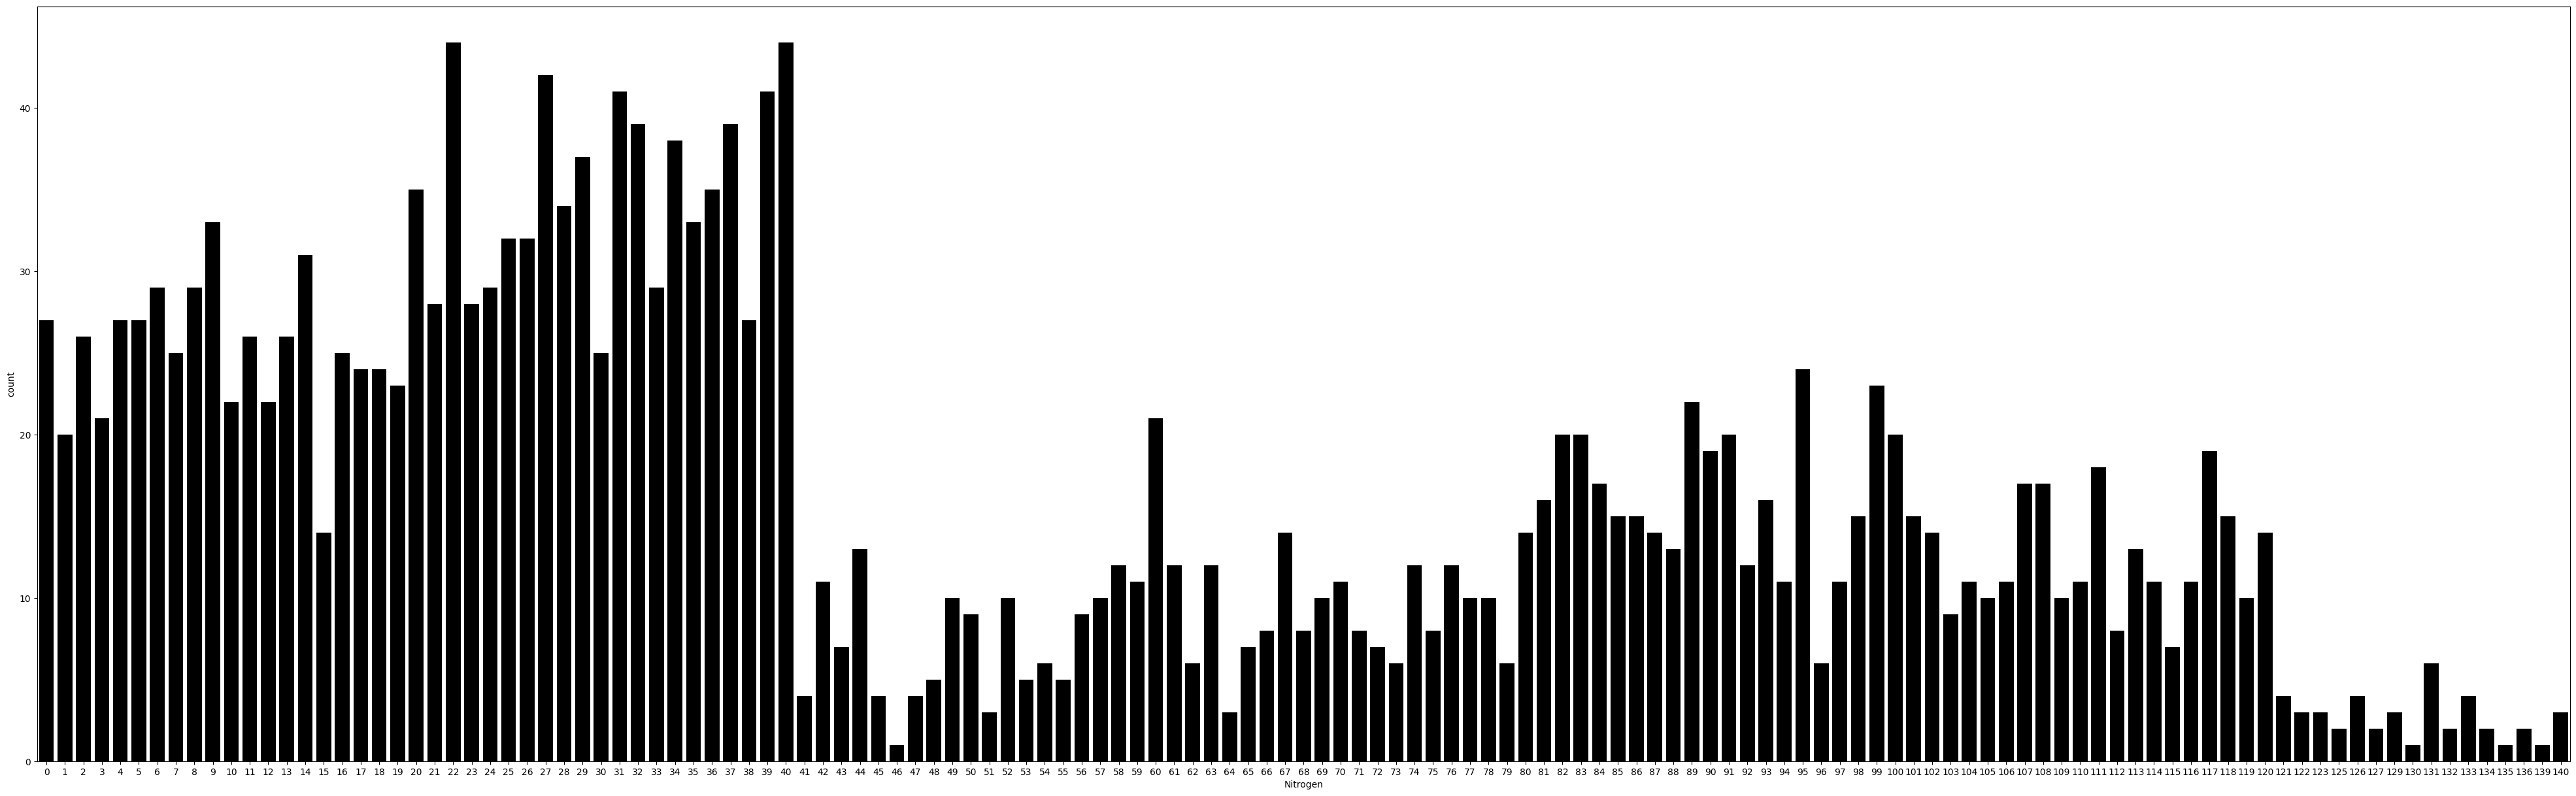

In [ ]:
plt.figure(figsize=(50,15))
sea.countplot(data=data,x='Nitrogen',color='black')
plt.show()

<Axes: ylabel='Nitrogen'>

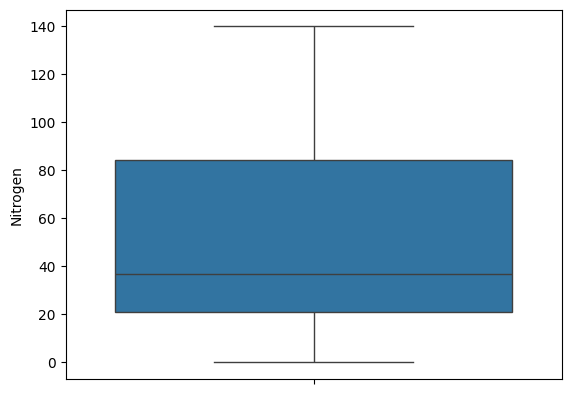

In [ ]:
sea.boxplot(data['Nitrogen'])

In [ ]:
data.columns

Index(['Nitrogen', 'Phosphorus', 'Potassium', 'temperature', 'humidity', 'pH',
       'rainfall', 'Crop'],
      dtype='object')

In [ ]:
data['Phosphorus']

,Phosphorus
0,42
1,58
2,55
3,35
4,42
...,...
2195,34
2196,15
2197,33
2198,32


In [ ]:
data['Phosphorus'].isnull().sum()

np.int64(0)

In [ ]:
data['Phosphorus'].describe()

,Phosphorus
count,2200.000000
mean,53.362727
std,32.985883
min,5.000000
25%,28.000000
50%,51.000000
75%,68.000000
max,145.000000


In [ ]:
data['Phosphorus'].value_counts()

,count
Phosphorus,
60,56
58,48
56,46
55,44
57,42
...,...
83,2
90,2
82,2


<Axes: ylabel='Phosphorus'>

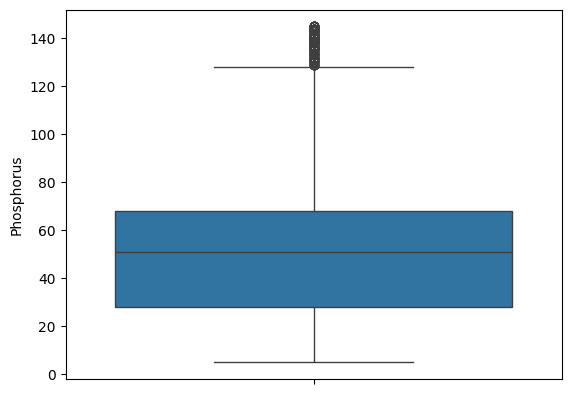

In [ ]:
sea.boxplot(data['Phosphorus'])

In [ ]:
Q1=data['Phosphorus'].quantile(0.25)
Q3=data['Phosphorus'].quantile(0.75)
IQR=Q3-Q1
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR
data=data[(data['Potassium']>=lower)&(data['Potassium']<=upper)]

<Axes: ylabel='Phosphorus'>

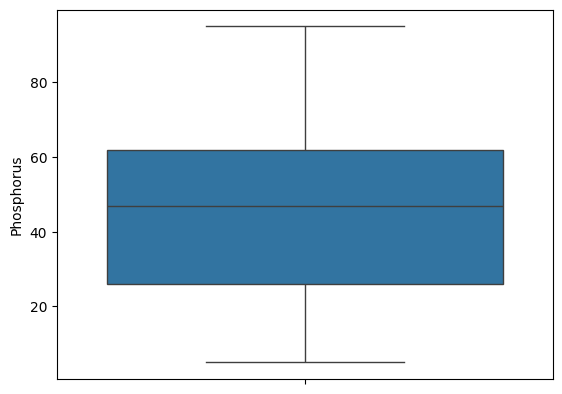

In [ ]:
sea.boxplot(data['Phosphorus'])

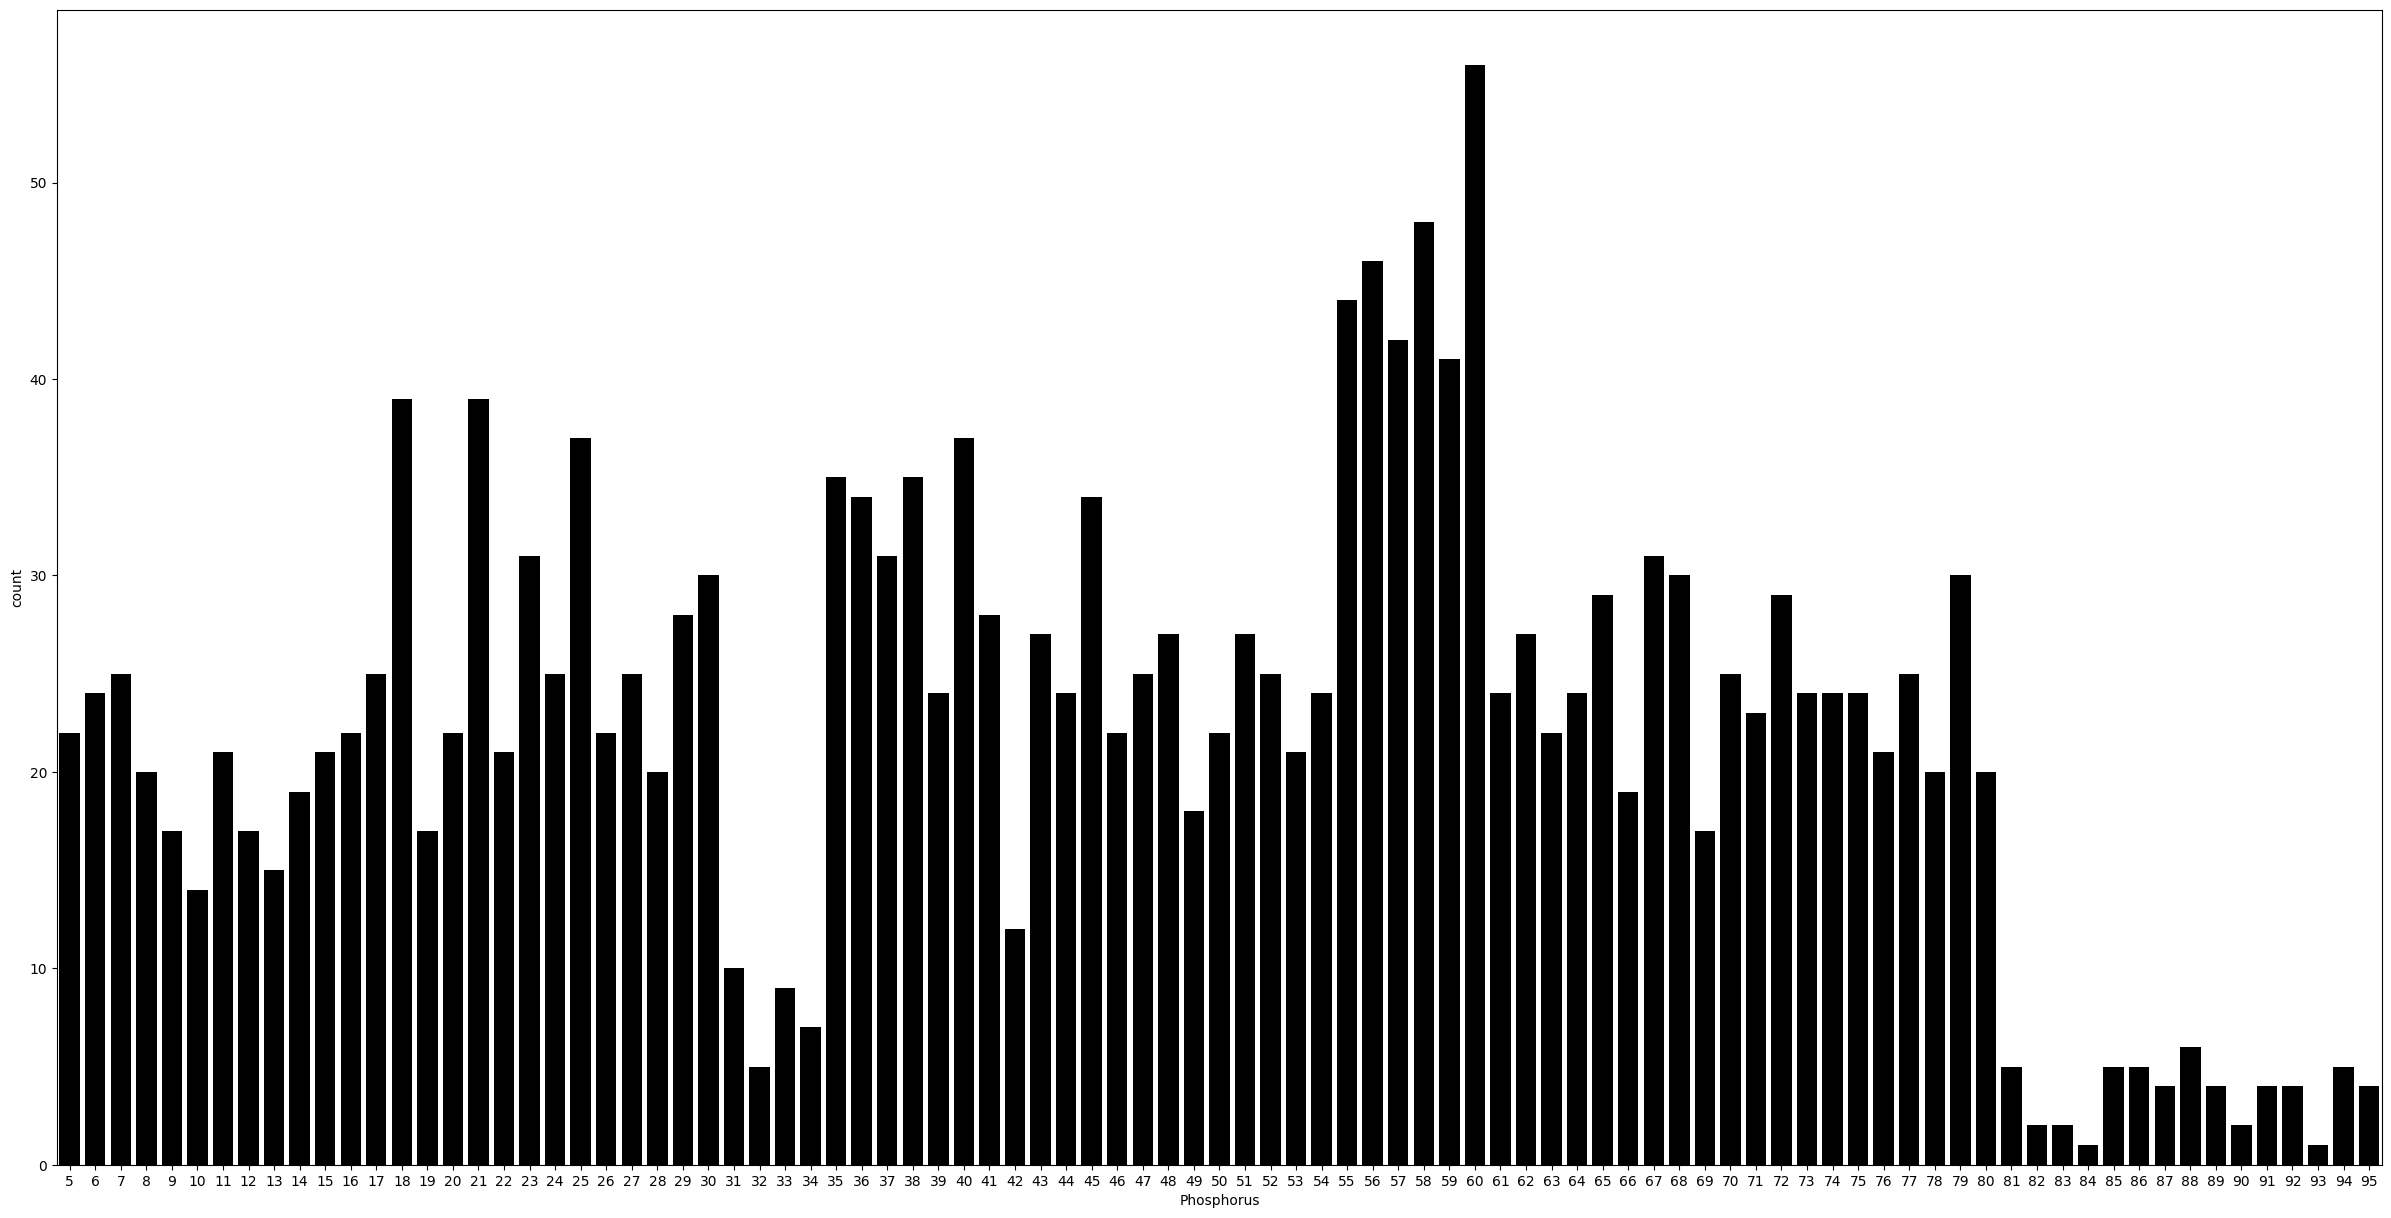

In [ ]:
plt.figure(figsize=(30,15))
sea.countplot(data=data,x='Phosphorus',color='black')
plt.show()

In [ ]:
data['Phosphorus'].isnull().sum()

np.int64(0)

<Axes: xlabel='Phosphorus', ylabel='Count'>

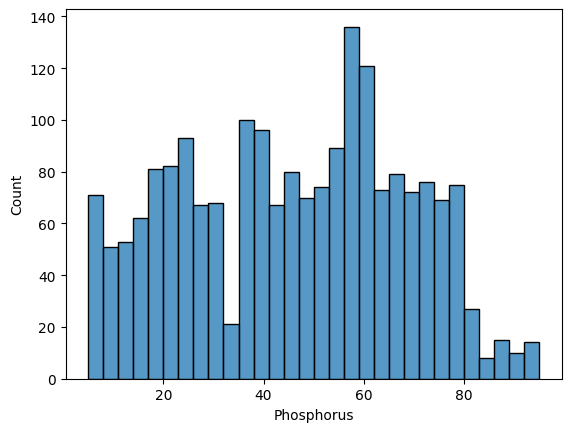

In [ ]:
sea.histplot(data['Phosphorus'],bins=30)

In [ ]:
data.columns

Index(['Nitrogen', 'Phosphorus', 'Potassium', 'temperature', 'humidity', 'pH',
       'rainfall', 'Crop'],
      dtype='object')

In [ ]:
data['Potassium']

,Potassium
0,43
1,41
2,44
3,40
4,42
...,...
2195,32
2196,27
2197,30
2198,34


In [ ]:
data['Potassium'].describe()

,Potassium
count,2000.000000
mean,32.964000
std,16.824424
min,5.000000
25%,20.000000
50%,29.000000
75%,45.000000
max,85.000000


<Axes: ylabel='Potassium'>

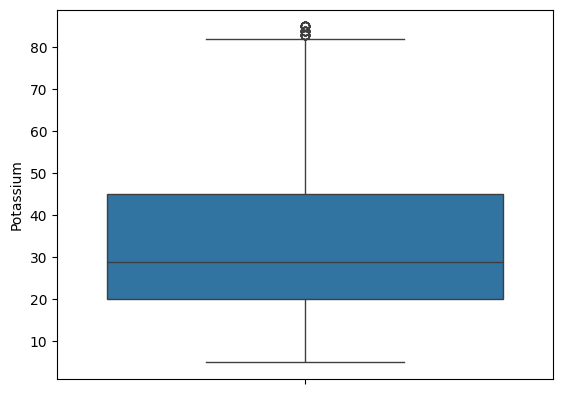

In [ ]:
sea.boxplot(data['Potassium'])

In [ ]:
Q1=data['Potassium'].quantile(0.25)
Q3=data['Potassium'].quantile(0.75)
IQR=Q3-Q1
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR
data=data[(data['Potassium']>=lower)&(data['Potassium']<=upper)]


<Axes: ylabel='Potassium'>

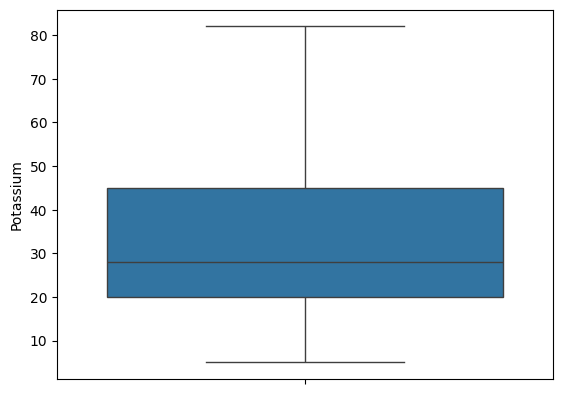

In [ ]:
sea.boxplot(data['Potassium'])

In [ ]:
data['Potassium']

,Potassium
0,43
1,41
2,44
3,40
4,42
...,...
2195,32
2196,27
2197,30
2198,34


In [ ]:
data['Potassium'].value_counts()

,count
Potassium,
17,90
22,87
15,86
20,80
25,78
19,77
21,74
18,72
45,65


In [ ]:
data.columns

Index(['Nitrogen', 'Phosphorus', 'Potassium', 'temperature', 'humidity', 'pH',
       'rainfall', 'Crop'],
      dtype='object')

In [ ]:
data['temperature']

,temperature
0,20.879744
1,21.770462
2,23.004459
3,26.491096
4,20.130175
...,...
2195,26.774637
2196,27.417112
2197,24.131797
2198,26.272418


In [ ]:
data['temperature'].isnull().sum()

np.int64(0)

In [ ]:
data['temperature'].value_counts()

,count
temperature,
23.603016,1
20.879744,1
21.770462,1
23.004459,1
24.592457,1
...,...
24.515881,1
20.277744,1
22.708838,1


In [ ]:
data['temperature'].describe()

,temperature
count,1972.000000
mean,25.950981
std,4.738383
min,10.010813
25%,23.335179
50%,25.950051
75%,28.676256
max,43.675493


<Axes: ylabel='temperature'>

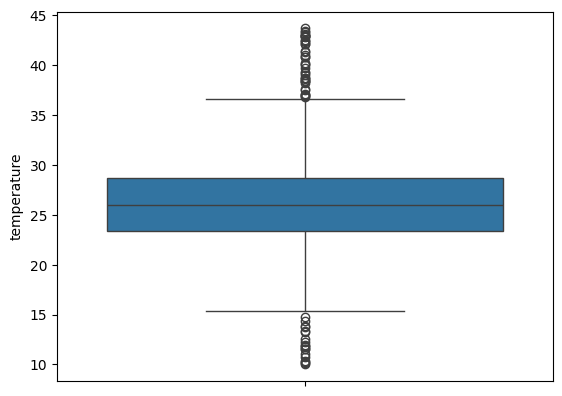

In [ ]:
sea.boxplot(data['temperature'])

In [ ]:
Q1=data['temperature'].quantile(0.25)
Q3=data['temperature'].quantile(0.75)
IQR=Q3-Q1
lower=Q1-1.6*IQR
upper=Q3+1.6*IQR
data=data[(data['temperature']>=lower)&(data['temperature']<=upper)]


<Axes: ylabel='temperature'>

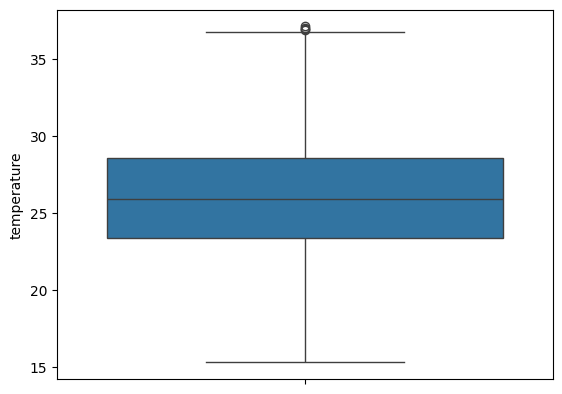

In [ ]:
sea.boxplot(data['temperature'],whis=1.6)

In [ ]:
data.columns

Index(['Nitrogen', 'Phosphorus', 'Potassium', 'temperature', 'humidity', 'pH',
       'rainfall', 'Crop'],
      dtype='object')

In [ ]:
data['humidity']

,humidity
0,82.002744
1,80.319644
2,82.320763
3,80.158363
4,81.604873
...,...
2195,66.413269
2196,56.636362
2197,67.225123
2198,52.127394


In [ ]:
data['humidity'].describe()

,humidity
count,1918.000000
mean,70.060038
std,21.969104
min,14.258040
25%,57.827231
50%,77.457230
75%,87.837125
max,99.981876


<Axes: ylabel='humidity'>

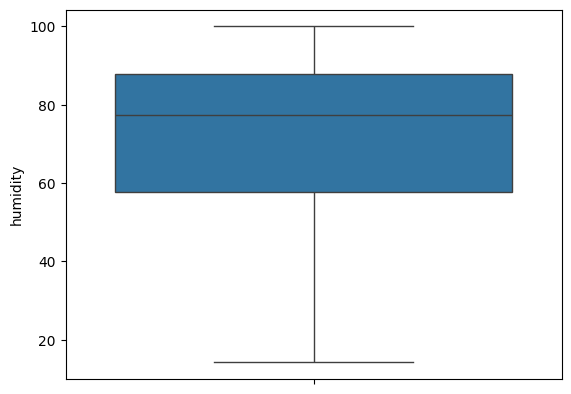

In [ ]:
sea.boxplot(data['humidity'])

In [ ]:
Q1=data['humidity'].quantile(0.25)
Q3=data['humidity'].quantile(0.75)
IQR=Q3-Q1
lower=Q1-1.6*IQR
upper=Q3+1.6*IQR
data=data[(data['humidity']>=lower)&(data['humidity']<=upper)]

<Axes: ylabel='humidity'>

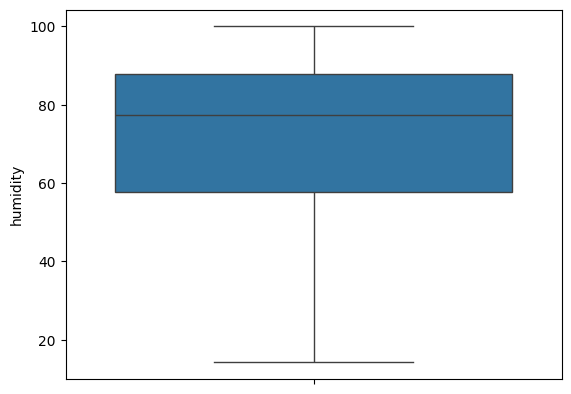

In [ ]:
sea.boxplot(data['humidity'],whis=1.6)

In [ ]:
data.columns

Index(['Nitrogen', 'Phosphorus', 'Potassium', 'temperature', 'humidity', 'pH',
       'rainfall', 'Crop'],
      dtype='object')

In [ ]:
data['pH']

,pH
0,6.502985
1,7.038096
2,7.840207
3,6.980401
4,7.628473
...,...
2195,6.780064
2196,6.086922
2197,6.362608
2198,6.758793


In [ ]:
data['pH'].describe()

,pH
count,1918.000000
mean,6.500840
std,0.793253
min,3.504752
25%,6.012649
50%,6.470059
75%,6.964313
max,9.935091


In [ ]:
data['pH'].isnull().sum()

np.int64(0)

In [ ]:
data['pH'].duplicated().sum()

np.int64(0)

<Axes: ylabel='pH'>

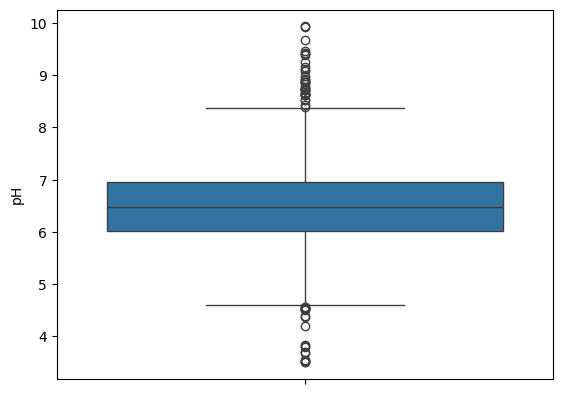

In [ ]:
sea.boxplot(data['pH'])

In [ ]:
Q1=data['pH'].quantile(0.25)
Q3=data['pH'].quantile(0.75)
IQR=Q3-Q1
lower=Q1-1.6*IQR
upper=Q3+1.6*IQR
data=data[(data['pH']>=lower)&(data['pH']<=upper)]

<Axes: ylabel='pH'>

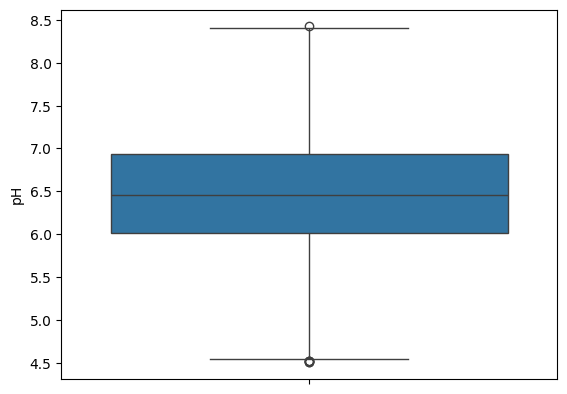

In [ ]:
sea.boxplot(data['pH'],whis=1.6)

In [ ]:
data.columns

Index(['Nitrogen', 'Phosphorus', 'Potassium', 'temperature', 'humidity', 'pH',
       'rainfall', 'Crop'],
      dtype='object')

In [ ]:
data['rainfall']

,rainfall
0,202.935536
1,226.655537
2,263.964248
3,242.864034
4,262.717340
...,...
2195,177.774507
2196,127.924610
2197,173.322839
2198,127.175293


In [ ]:
data['rainfall'].describe()

,rainfall
count,1872.000000
mean,105.308994
std,57.515528
min,20.211267
25%,61.434036
50%,95.919670
75%,139.310844
max,298.560117


In [ ]:
data['rainfall'].isnull().sum()

np.int64(0)

<Axes: ylabel='rainfall'>

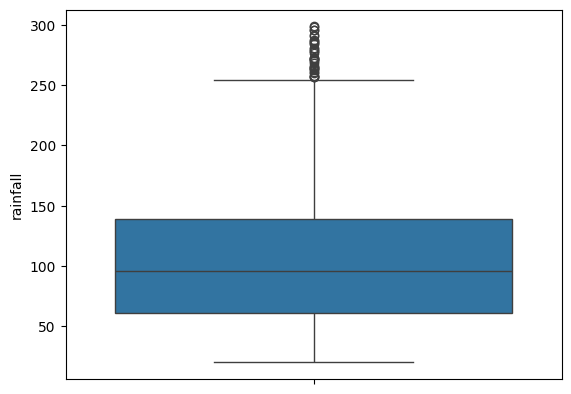

In [ ]:
sea.boxplot(data['rainfall'])

In [ ]:
Q1=data['rainfall'].quantile(0.25)
Q3=data['rainfall'].quantile(0.75)
IQR=Q3-Q1
lower=Q1-1.7*IQR
upper=Q3+1.7*IQR
data=data[(data['rainfall']>=lower)&(data['rainfall']<=upper)]


<Axes: ylabel='rainfall'>

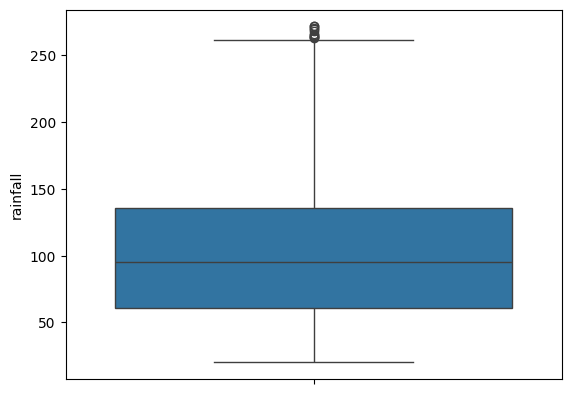

In [ ]:
sea.boxplot(data['rainfall'],whis=1.7)

In [ ]:
data.columns

Index(['Nitrogen', 'Phosphorus', 'Potassium', 'temperature', 'humidity', 'pH',
       'rainfall', 'Crop'],
      dtype='object')

In [ ]:
data['Crop'].value_counts()

,count
Crop,
maize,100
kidneybeans,100
mungbean,100
pigeonpeas,100
jute,100
muskmelon,100
blackgram,100
lentil,100
banana,100


In [ ]:
data['Crop']

,Crop
0,rice
1,rice
2,rice
3,rice
4,rice
...,...
2195,coffee
2196,coffee
2197,coffee
2198,coffee


<Axes: xlabel='count', ylabel='Crop'>

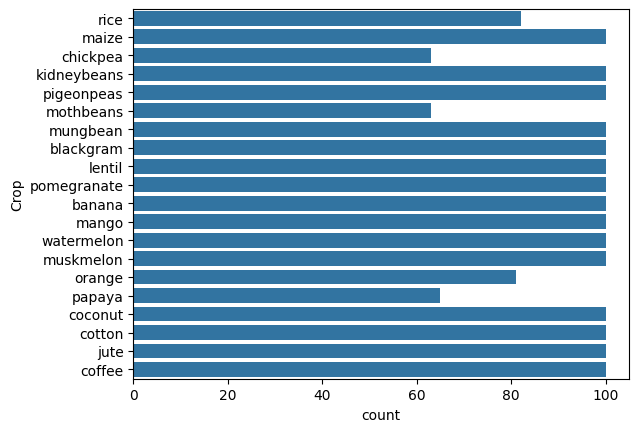

In [ ]:

sea.countplot(data['Crop'])

In [ ]:
data.columns

Index(['Nitrogen', 'Phosphorus', 'Potassium', 'temperature', 'humidity', 'pH',
       'rainfall', 'Crop'],
      dtype='object')

In [ ]:
X=data.drop(columns=['Crop'])

In [ ]:
y=data['Crop']

In [ ]:
X

,Nitrogen,Phosphorus,Potassium,temperature,humidity,pH,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [ ]:
X.shape

(1854, 7)

In [ ]:
y.shape

(1854,)

In [ ]:
y

,Crop
0,rice
1,rice
2,rice
3,rice
4,rice
...,...
2195,coffee
2196,coffee
2197,coffee
2198,coffee


In [ ]:
X

,Nitrogen,Phosphorus,Potassium,temperature,humidity,pH,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
model=RandomForestClassifier(n_estimators=50
                             )
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(accuracy_score(y_test,y_pred))



y_pred_seen=model.predict(X_train)
print(accuracy_score(y_train,y_pred_seen))




0.9919137466307277
1.0


In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score

f1 = f1_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')


print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")


F1 Score: 0.9907282695374799
Precision: 0.9920588235294119
Recall: 0.9902714932126697


In [ ]:
classification_report=classification_report(y_test,y_pred)
print(classification_report)

              precision    recall  f1-score   support

      banana       1.00      1.00      1.00        26
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        16
     coconut       1.00      1.00      1.00        23
      coffee       1.00      1.00      1.00        25
      cotton       1.00      1.00      1.00        20
        jute       0.90      1.00      0.95        18
 kidneybeans       1.00      1.00      1.00        24
      lentil       1.00      1.00      1.00        14
       maize       1.00      1.00      1.00        12
       mango       1.00      1.00      1.00        17
   mothbeans       1.00      0.92      0.96        13
    mungbean       1.00      1.00      1.00        22
   muskmelon       1.00      1.00      1.00        16
      orange       1.00      1.00      1.00        21
      papaya       1.00      1.00      1.00        13
  pigeonpeas       1.00      1.00      1.00        27
 pomegranate       1.00    

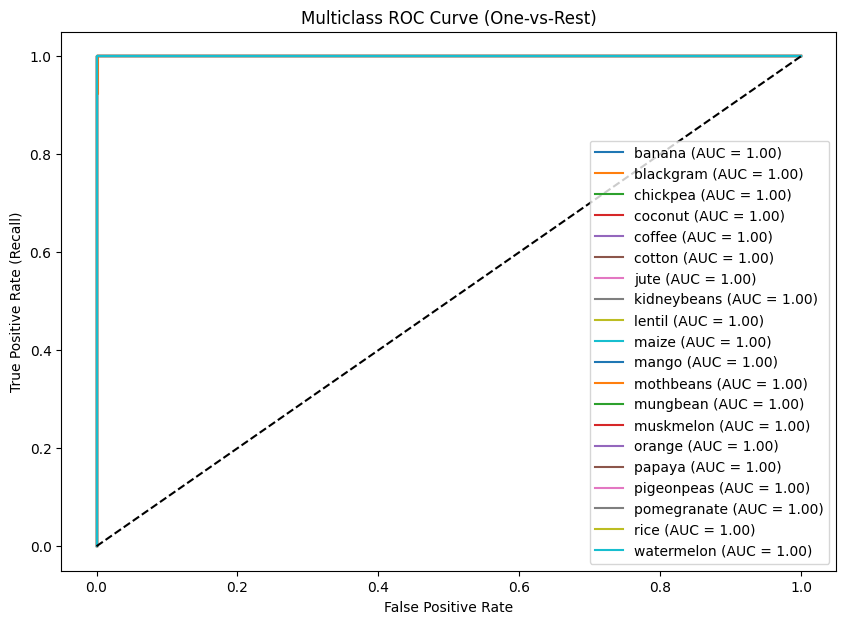

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

classes = model.classes_
y_test_bin = label_binarize(y_test, classes=classes)
y_pred_prob = model.predict_proba(X_test)


plt.figure(figsize=(10, 7))
for i, cls in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{cls} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("Multiclass ROC Curve (One-vs-Rest)")
plt.legend(loc="lower right")
plt.show()


In [ ]:
data.columns

Index(['Nitrogen', 'Phosphorus', 'Potassium', 'temperature', 'humidity', 'pH',
       'rainfall', 'Crop'],
      dtype='object')

In [ ]:
import joblib

In [ ]:
save_model=joblib.dump(model,'crops_pred.joblib')
save_scaler=joblib.dump(scaler,'scaler.joblib')


In [ ]:
from google.colab import files
files.download('crops_pred.joblib')
files.download('scaler.joblib')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

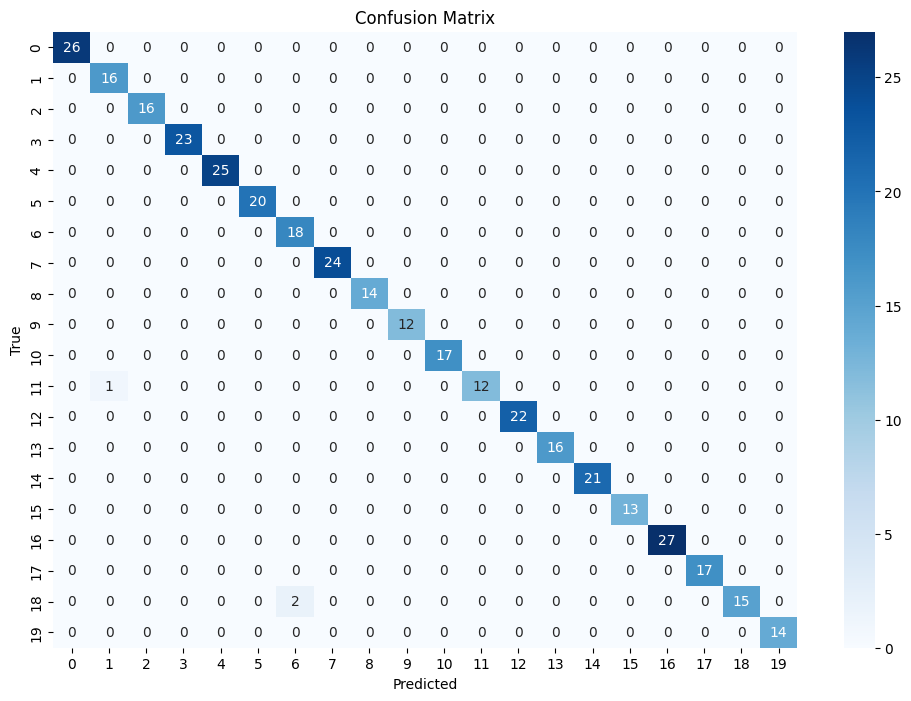

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
sea.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
data['rainfall'].min(

)

20.21126747